
Copyright (C) 2019 Sergio G Rodrigo <sergut@unizar.es> & Luis Martin-Moreno <lmm@unizar.es>

**Important:** 
*IrisME* is licensed under the AGPL and it is free to use. if you are using, or plan to use this example, specially if it is for research or academic purposes, please send an email with your name, institution and a brief description of your interest for this program.  If you use this example of *IrisME* in a work that leads to a scientific or academic publication, we would appreciate it if you would kindly cite Refs. [1,2]  in your manuscript.


***
- - -

+ **Example 1: Localized Extraordinary Optical Transmission**

This example shows you how to obtain transmission and reflection of terahertz waves through a given hole array (perforating a Perfect Electric Conductor metal screen). The period chosen is $p_x=p_y=400 \mu$m, and the rectangles are defined by $a_x = 10 \mu$m and  $a_y = 350 \mu$m sides.  The PEC screen is $h = 25 \mu$m and the holes are filled with a dielectric, $\epsilon_{II} = 4$. The cover and substrate dielectric constants are equal ($\epsilon_{I}= \epsilon_{III}= 2$).  Light iluminates the structure at normal incidence, being the electric field polarized along the x-axis.

<img src="HA_geometry.png" alt="drawing" width="400"/>

**Steps:**
1. Run IrisME.nb, included in this version, at the same directory this script in launched. The file input_IrisME.dat contains the geometrical and rest of parameters for IrisME.nb. The output file, T-R_IrisME.dat, has 3 data columns: wavelengths ( $\mu$m), transmission and reflection. Mathematica has to be installed (from 8.0 version). If not, you will still use IrisMEadv. 

2. Run next cells. The script calls the IrisMEAdv 64-bits executable for Windows/Linux, included in this release.  input_IrisMEadv.dat contais the geometrical and rest of parameters for IrisMEadv. The output file is T-R_IrisMEadv.dat, which contains 3 data columns: wavelengths ($\mu$ m), transmission and reflection. The Python script finally plots all the outputs in a figure. Note that you can alternatively run IrsMEAdv programs from console.


This example is extracted from Ref. [1]. The transmission calculated can be compared with one of those shown in Figure 7-(top). In that work we investigated the so-called Localized Extraordinary Optical Tranmission (LEOT) phenomenom, for which the spectral position of transmission and reflection resonances appearing in subwavelength apertures drilled in metallic films drastically changes when the dielectric environment is modified, for extremely subwavelength fim widths.  These results are quantitatively correct in the microwave and terahertz regimes, but they also have qualitative validity in the optical regime. Additional details about EOT can be found in Ref. [2], and references therein.
    
*References:*

[1] S. Carretero-Palacios, F. J. García-Vidal, L. Martín-Moreno, and 
S. G. Rodrigo *Effect of film thickness and dielectric environment on optical transmission through subwavelength holes*,
Phys. Rev. B 85, 035417 (2012).

[2] S.G. Rodrigo, F. de León-Pérez, and L. Martín-Moreno, *Extraordinary Optical Transmission: fundamentals and applications*, Proceedings of the IEEE 104, 2288 (2016). 

    
***
- - -


In [64]:
import shutil
shutil.copyfile('../IrisMEadv64_Linux.exe', './IrisMEadv64_Linux.exe') # Copy files from master directory to example directory
shutil.copyfile('../IrisMEadv64_Windows.exe', './IrisMEadv64_Windows.exe') # Copy files from master directory to example directory
#shutil.copyfile('../IrisME.nb', './IrisME.nb') # Copy files from master directory to example directory




'./IrisMEadv64_Windows.exe'

In [65]:
import subprocess
import os

# Calls IrisMEadv program 
from sys import platform
if platform == "linux" or platform == "linux2":
   cmdMEadv = "IrisMEadv64_Linux.exe" # IrisMEAdv Fortran implementation (64 bits) for Linux
   fileMEadv=os.path.exists('./irisMEadv64_Linux.exe')   
   if (fileMEadv):
    process = subprocess.run(cmdMEadv,capture_output=True)    
   else:
        print(cmdMEadv,"doesn't exist!") 
elif platform == "darwin":
   print("OS Mac not supported")
elif platform == "win32":
   cmdMEadv = "IrisMEadv64_Windows.exe" # IrisMEAdv Fortran implementation (64 bits) for Windows
   fileMEadv=os.path.exists('./irisMEadv64_Windows.exe')    
   if (fileMEadv):
    process = subprocess.run(cmdMEadv,capture_output=True)
   else:
        print(cmdMEadv,"doesn't exist!") 

#print(process.stdout)
#print(process.stderr)


./T-R_IrisME.dat doesn't exist!


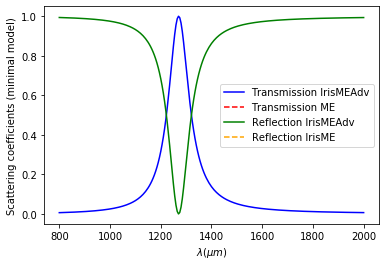

In [66]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy

i=0
wl1,T1,R1,wl2,T2,R2 = [],[],[],[],[],[]


fileMEadv=os.path.exists('./T-R_IrisMEadv.dat')
fileME=os.path.exists('./T-R_IrisME.dat')

if (fileMEadv):   
    for line in open('T-R_IrisMEadv.dat', 'r'):
        values = [float(s) for s in line.split()]
        wl1.append(values[0])
        T1.append(values[1])
        R1.append(values[2])
        #print(i,X[i],Y[i])
        #i=i+1
else:
     print("./T-R_IrisMEadv.dat doesn't exist!")


if (fileME):           
    for line in open('T-R_IrisME.dat', 'r'):
        values = [float(s) for s in line.split()]
        wl2.append(values[0])
        T2.append(values[1])
        R2.append(values[2])
else: 
    print("./T-R_IrisME.dat doesn't exist!")

fig, ax = plt.subplots()
ax.plot(wl1, T1, color="blue", label="Transmission IrisMEAdv")
ax.plot(wl2, T2, color="red",ls="--", label="Transmission ME")
ax.plot(wl1, R1, color="green", label="Reflection IrisMEAdv")
ax.plot(wl2, R2, color="orange",ls="--", label="Reflection IrisME")
#txt = "$\lambda$ (nm) \n Transmission and reflection of light are obtained through a hole array (period = 400 $\mu$m) with rectangles ($a_x = 10 \mu$m, $a_y = 350 \mu$m) drilled in a thin PEC screen of $h = 25 \mu$m and filled with $\epsilon_I = 4$. The symmetric configuration is considered and $\epsilon_{I}= \epsilon_{III}= 2$"
txt = "$\lambda (\mu m)$"
ax.set_xlabel(txt)
ax.set_ylabel("Scattering coefficients (minimal model)")
ax.legend()
fig.savefig("T-R.png", dpi=200, facecolor="#f1f1f1")


In [67]:
 # Delete files of master directory in example directory
os.remove('./IrisMEadv64_Linux.exe') 
os.remove('./IrisMEadv64_Windows.exe')
#os.remove('./IrisME.nb') 